<a href="https://colab.research.google.com/github/salvager2019/2020-WebScrapy/blob/master/firstNeural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
!pip install graphviz
!pip install nbdev>=0.2.12
!pip install pandas
!pip install scikit_learn
!pip install azure-cognitiveservices-search-imagesearch
!pip install sentencepiece
!pip install ipywidgets
import fastbook
fastbook.setup_book()

In [2]:
from fastai.vision.all import *
import matplotlib.pyplot as plt
from PIL import Image

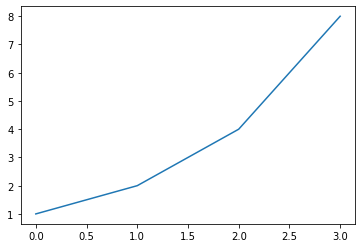

In [3]:
a = 1
b = a + 1
c = b + a + 1
d = c + b + a + 1
a, b, c ,d
plt.plot([a,b,c,d])
plt.show()

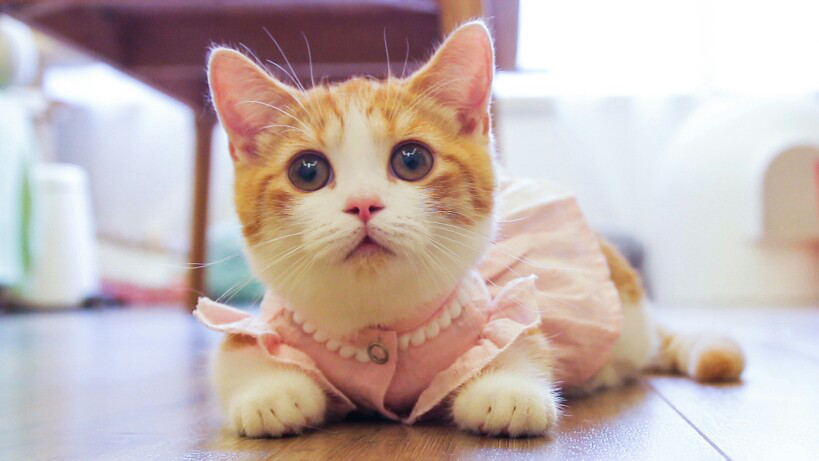

In [4]:
Image.open('gdrive/My Drive/Colab Notebooks/images/cat.jpg')

In [5]:
import ipywidgets as widgets

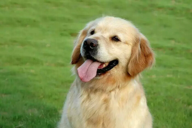

In [6]:
img = PILImage.create('gdrive/My Drive/Colab Notebooks/images/dog.jpeg')
img.to_thumb(192)

In [7]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [8]:
img = PILImage.create(uploader.data[0])

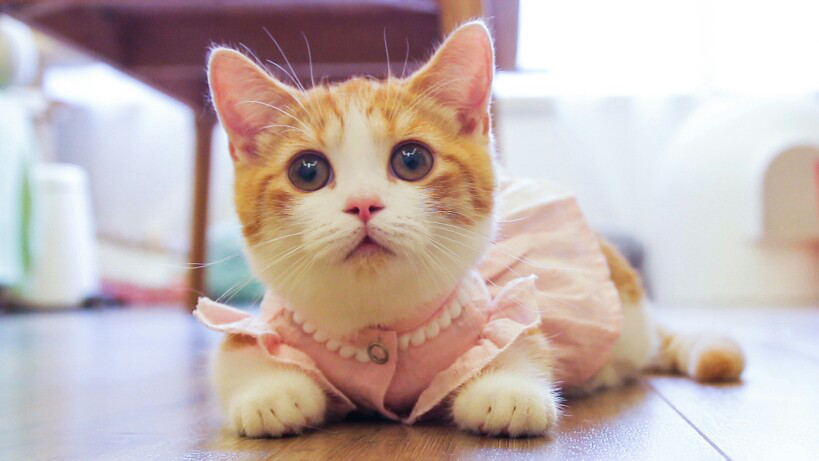

In [9]:
img

In [10]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.174371,0.021575,0.005413,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.060978,0.011289,0.006766,00:51


In [11]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [12]:
untar_data

<function fastai.data.external.untar_data>

In [ ]:
doc(ImageDataLoaders.from_name_func)

In [4]:
from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)

Saving utils.py to utils.py


2285

In [ ]:
import utils

In [ ]:
import graphviz as gv

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.804818,2.327075,00:01


epoch,train_loss,valid_loss,time
0,2.123016,1.649764,00:01
1,1.991591,1.884251,00:01
2,1.896815,1.239878,00:01
3,1.697510,1.222255,00:01
4,1.539820,1.022828,00:01
5,1.410649,0.970237,00:01
6,1.302301,0.918703,00:01
7,1.216383,0.914854,00:01


In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.609177,0.417942,0.810200,02:11


epoch,train_loss,valid_loss,accuracy,time
0,0.311446,0.248860,0.900600,04:21
1,0.235931,0.203850,0.920360,04:05
2,0.193314,0.198506,0.925080,04:13
3,0.166292,0.191148,0.929520,04:13


In [ ]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0042, 0.9958]))

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.369297,0.354183,0.836302,00:05
1,0.357332,0.345323,0.839681,00:05
2,0.339492,0.340339,0.840448,00:05


In [13]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.491161,1.502690,00:00


epoch,train_loss,valid_loss,time
0,1.356224,1.441735,00:00
1,1.255831,1.255347,00:00
2,1.017037,0.936529,00:00
3,0.780089,0.791371,00:00
4,0.675787,0.754587,00:00
5,0.631652,0.743272,00:00
6,0.616931,0.739187,00:00
7,0.597788,0.735827,00:00
8,0.597889,0.735402,00:00
9,0.595639,0.735245,00:00


In [14]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,37.0,27.0,3.0,3.715110
1,98.0,60.0,4.0,4.739488
2,49.0,50.0,4.0,3.988432
3,62.0,86.0,4.0,3.888949
4,1.0,92.0,2.0,4.006652
5,85.0,36.0,3.5,4.175850
6,74.0,1.0,4.0,3.962478
7,36.0,85.0,4.0,3.981273
8,85.0,70.0,5.0,4.206559


In [9]:
print('Lesson-2')
print('-'*50)

Lesson-2
--------------------------------------------------


In [10]:
from utils import *

ModuleNotFoundError: ignored

In [ ]:
def is_cat(x):return x[0].isupper()
dls=ImageDataLoaders.from_name_func(
    path,get_image_files(path),valid_pct=0.2,seed=42,
    label_func=is_cat,item_tfms=Resize(224)
)
learn=cnn_learner(dls,resnet34,metrics=error_rate)